# Exploratory Data Analysis
The goal of this notebook is to explore the nba match details dataset. It has 47 columns, so there's quite a bit to unpack here. This notebook seeks to identify which features are important, and which ones are correlated. Trying to reduce our complexity here

# Step 0: Dependencies

## 0.1: Install dependencies
Since I am using a venv, we need to install these dependencies

In [21]:
!pip install pandas numpy matplotlib

In [18]:
!pip install plotly

## 0.2: Import Dependencies
Now that we have installed our dependencies, we need to import them.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

## Step 1: Load data
Now, let's load in our data, and take a look at it. This dataset was a very lucky find, and has data from every single NBA game every up until 2022.

In [2]:
df = pd.read_csv('NBA_MATCH_DETAILS.csv')

Let's take a look at the head to get an idea of what stats we are using.

In [3]:
df.head()

,SEASON_ID,GAME_DATE,GAME_ID,MATCHUP,TEAM_NAME_HOME,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,...,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PTS_HOME,WL_HOME
0,NaN,1981-03-29,28000934,ATL vs. MIL,Atlanta Hawks,1610612737,ATL,41.0,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,38.0,132,128,L
1,NaN,1981-03-26,28000919,ATL vs. IND,Atlanta Hawks,1610612737,ATL,43.0,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,20.0,115,107,L
2,NaN,1981-03-24,28000908,ATL vs. DET,Atlanta Hawks,1610612737,ATL,41.0,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,22.0,91,96,W
3,NaN,1981-03-14,28000845,ATL vs. CLE,Atlanta Hawks,1610612737,ATL,45.0,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,27.0,112,110,L
4,NaN,1981-03-13,28000839,ATL vs. DEN,Atlanta Hawks,1610612737,ATL,47.0,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,28.0,117,119,W


Looks pretty intimidating. Let's look at how many columns we have

In [4]:
df.shape[1]

47

47 columns! This leaves us a lot of room to work with, but we definitely aren't going to want to fit this many columns into any sort of model

## Step 2: Null Value monitoring
While not apparent in the df head, certain statistics weren't tracked up until certain recent years. Now we'll have to make a decision to not use the modern statistics, or just omit the older games. Let's take a look

First, lets try to look for the columns with null values

In [5]:
null_cols = df.isnull().any()
null_cols_df = df.columns[null_cols]
print(null_cols_df)
print(f'Number of columns with null values: {len(null_cols_df)}')
nonNull_cols_df = df.columns[~null_cols]
print(nonNull_cols_df)
print(f'Number of columns without null values: {len(nonNull_cols_df)}')

Index(['SEASON_ID', 'FGM_HOME', 'FGA_HOME', 'FG_PCT_HOME', 'FG3M_HOME',
       'FG3A_HOME', 'FG3_PCT_HOME', 'FTM_HOME', 'FTA_HOME', 'FT_PCT_HOME',
       'OREB_HOME', 'DREB_HOME', 'AST_HOME', 'STL_HOME', 'BLK_HOME',
       'TOV_HOME', 'PF_HOME', 'FGM_AWAY', 'FGA_AWAY', 'FG_PCT_AWAY',
       'FG3M_AWAY', 'FG3A_AWAY', 'FG3_PCT_AWAY', 'FTM_AWAY', 'FTA_AWAY',
       'FT_PCT_AWAY', 'OREB_AWAY', 'DREB_AWAY', 'AST_AWAY', 'STL_AWAY',
       'BLK_AWAY', 'TOV_AWAY', 'PF_AWAY', 'WL_HOME'],
      dtype='object')
Number of columns with null values: 34
Index(['GAME_DATE', 'GAME_ID', 'MATCHUP', 'TEAM_NAME_HOME', 'TEAM_ID_HOME',
       'TEAM_ABBREVIATION_HOME', 'REB_HOME', 'TEAM_NAME_AWAY', 'TEAM_ID_AWAY',
       'TEAM_ABBREVIATION_AWAY', 'REB_AWAY', 'PTS_AWAY', 'PTS_HOME'],
      dtype='object')
Number of columns without null values: 13


Great! However, most columns have some null values, and we can't make an accurate model with just points and rebounds. So, lets try to identify how many null values exist in each column, so we know if there are some columns with only a few null values.

SEASON_ID: 60467
GAME_DATE: 0
GAME_ID: 0
MATCHUP: 0
TEAM_NAME_HOME: 0
TEAM_ID_HOME: 0
TEAM_ABBREVIATION_HOME: 0
FGM_HOME: 7
FGA_HOME: 15091
FG_PCT_HOME: 15102
FG3M_HOME: 13722
FG3A_HOME: 18084
FG3_PCT_HOME: 19901
FTM_HOME: 9
FTA_HOME: 2346
FT_PCT_HOME: 2365
OREB_HOME: 18370
DREB_HOME: 18439
REB_HOME: 0
AST_HOME: 15415
STL_HOME: 18287
BLK_HOME: 18078
TOV_HOME: 18107
PF_HOME: 1639
TEAM_NAME_AWAY: 0
TEAM_ID_AWAY: 0
TEAM_ABBREVIATION_AWAY: 0
FGM_AWAY: 5
FGA_AWAY: 15091
FG_PCT_AWAY: 15099
FG3M_AWAY: 13722
FG3A_AWAY: 18084
FG3_PCT_AWAY: 19893
FTM_AWAY: 5
FTA_AWAY: 2344
FT_PCT_AWAY: 2368
OREB_AWAY: 18370
DREB_AWAY: 18438
REB_AWAY: 0
AST_AWAY: 15412
STL_AWAY: 18287
BLK_AWAY: 18077
TOV_AWAY: 18108
PF_AWAY: 1633
PTS_AWAY: 0
PTS_HOME: 0
WL_HOME: 1


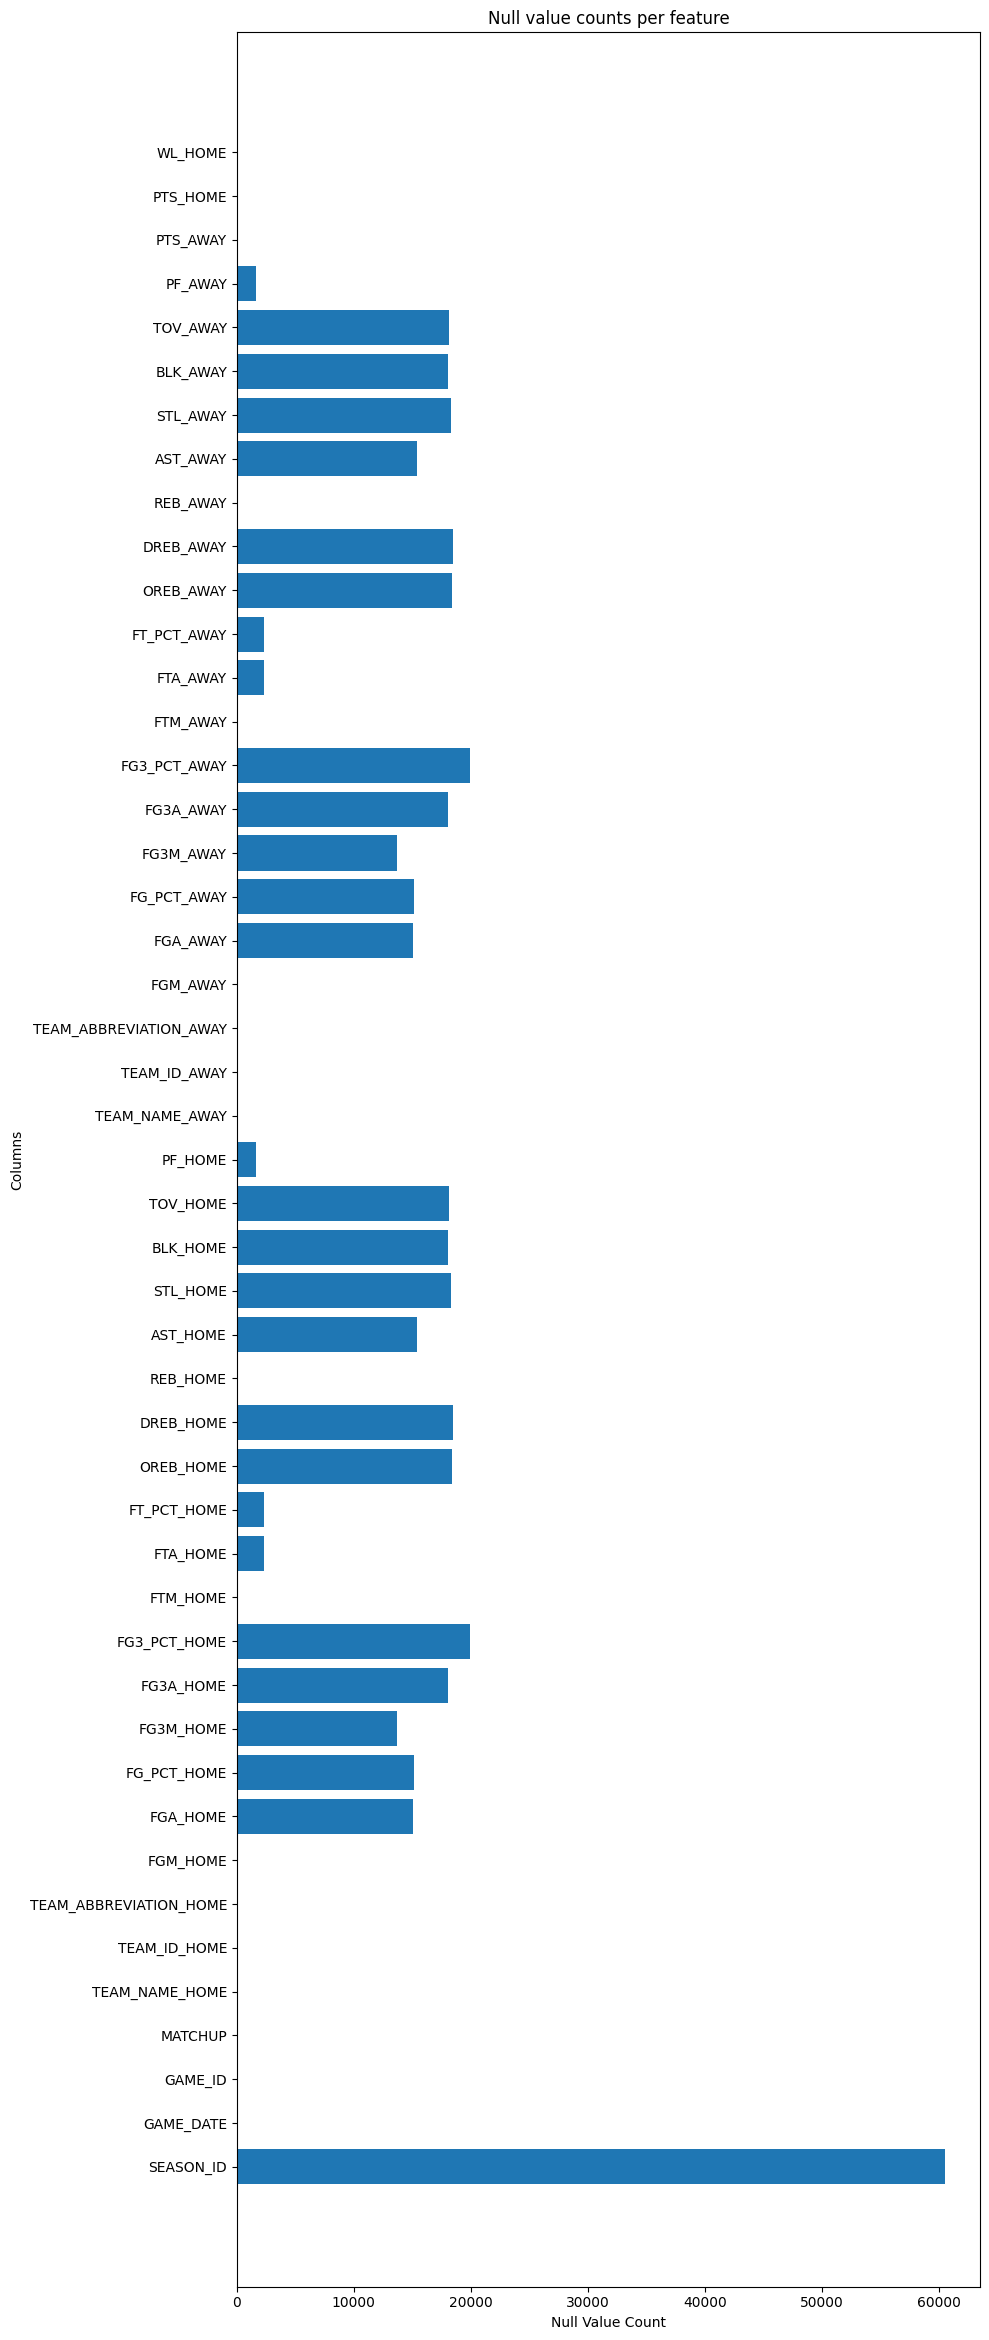

In [7]:
null_counts = {}

for col in df.columns:
    null_count = df[col].isnull().sum()
    null_counts[col] = null_count
    print(f"{col}: {null_count}")

#Plot this with a massive bar chart
#Depict massive figure size
plt.figure(figsize=(10, len(df.columns) / 2))

#Create horizontal bar chart
plt.barh(range(len(null_counts)), null_counts.values())

#Set tick label names
plt.yticks(range(len(null_counts)), null_counts.keys())

plt.xlabel('Null Value Count')
plt.ylabel('Columns')
plt.title('Null value counts per feature')

plt.tight_layout()
plt.show()

Perfect, now we have a bar chart. We can notice that many of these bar charts have a similar amount of null values. Let's try to check if any of them are the same. We can use a set to do this

In [8]:
seen_values = set()
duplicates = []
for val in null_counts.values():
    if val in seen_values:
        duplicates.append(val)
    else:
        seen_values.add(val)

print(duplicates)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 15091, 13722, 18084, 5, 18370, 0, 18287, 0, 0]


Ok it looks like theres some duplicate null values for sure. Also, from the bar chart, it seemed like there were a lot of values that had pretty similar null counts. Let's isolate those, and then try to count the amount of null values per season. This way, we can try to generalize when the newer statistics started being tracked

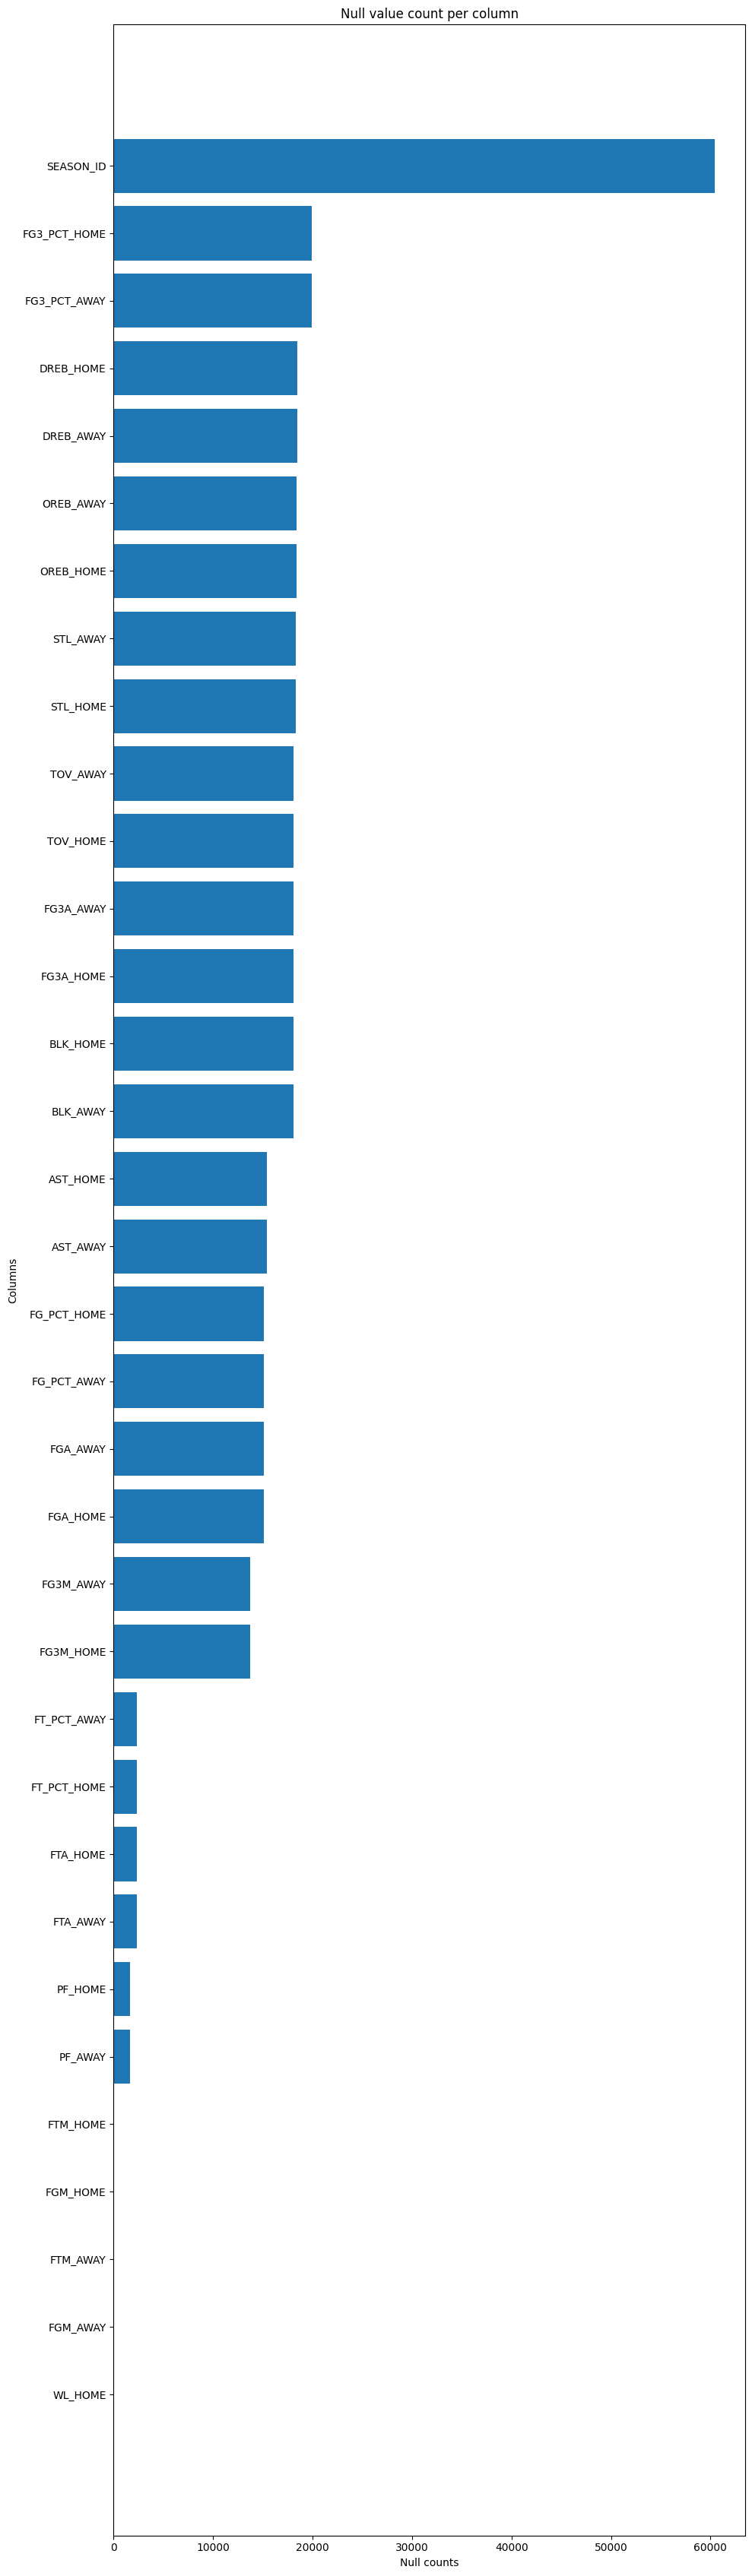

In [12]:
#Create a dict of col to null values, only for columns with at least one null value
filtered_cols = {col: count for col, count in null_counts.items() if count > 0}

#Sort columns by null values in ascending order
sorted_counts = dict(sorted(filtered_cols.items(), key=lambda item: item[1]))

#Plot these with a horizontal bar chart
plt.figure(figsize=(10, len(sorted_counts)))
plt.barh(list(sorted_counts.keys()), list(sorted_counts.values()))

plt.xlabel('Null counts')
plt.ylabel('Columns')
plt.title('Null value count per column')

plt.tight_layout()
plt.show()

Great! Ignoring season ID, which we don't really care about, it looks like FG3_PCT_HOME (and FG3_PCT_AWAY) is the most major statistic not tracked. Let's try to count how many null values there are per year, to see if there is a clear date that FG3_PCT started being tracked. 

In [ ]:
#Create a new column with the year that the game took place in
df['GAME_YEAR'] = df['GAME_DATE'].str[:4]
#Count the amount of null values in the FG3_PCT_HOME column, by year
null_counts_by_year = df.groupby('GAME_YEAR')['FG3_PCT_HOME'].apply(lambda x: x.isnull().sum()).reset_index()
#Sort df by year, ascending
sorted_null_counts = null_counts_by_year.sort_values(by='Year', ascending=True)
